**BRAIN TUMOR DETECTION IMPLEMENTATION**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive

/content/drive/MyDrive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain tumor dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

In [7]:
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Brain tumor dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [8]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3274, 150, 150, 3)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=101)

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
74/74 [==============================] - 30s 134ms/step - loss: 1.8942 - accuracy: 0.2843 - val_loss: 1.3453 - val_accuracy: 0.3053
Epoch 2/20
74/74 [==============================] - 7s 99ms/step - loss: 1.1905 - accuracy: 0.4578 - val_loss: 1.0399 - val_accuracy: 0.5382
Epoch 3/20
74/74 [==============================] - 7s 100ms/step - loss: 1.0203 - accuracy: 0.5541 - val_loss: 0.8932 - val_accuracy: 0.6336
Epoch 4/20
74/74 [==============================] - 7s 94ms/step - loss: 0.8979 - accuracy: 0.5969 - val_loss: 0.8556 - val_accuracy: 0.6832
Epoch 5/20
74/74 [==============================] - 7s 96ms/step - loss: 0.8138 - accuracy: 0.6479 - val_loss: 0.7926 - val_accuracy: 0.6412
Epoch 6/20
74/74 [==============================] - 7s 97ms/step - loss: 0.7062 - accuracy: 0.7009 - val_loss: 0.6992 - val_accuracy: 0.6985
Epoch 7/20
74/74 [==============================] - 7s 96ms/step - loss: 0.6338 - accuracy: 0.7344 - val_loss: 0.6551 - val_accuracy: 0.7214
Epoch 8/20

In [15]:
model.save('Braintumor.h5')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

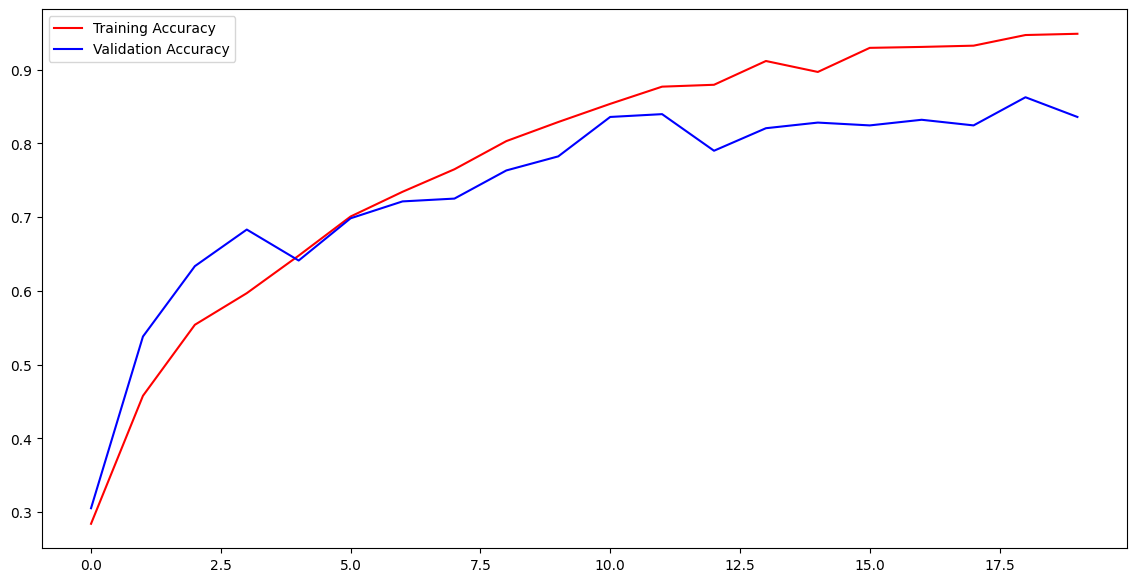

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

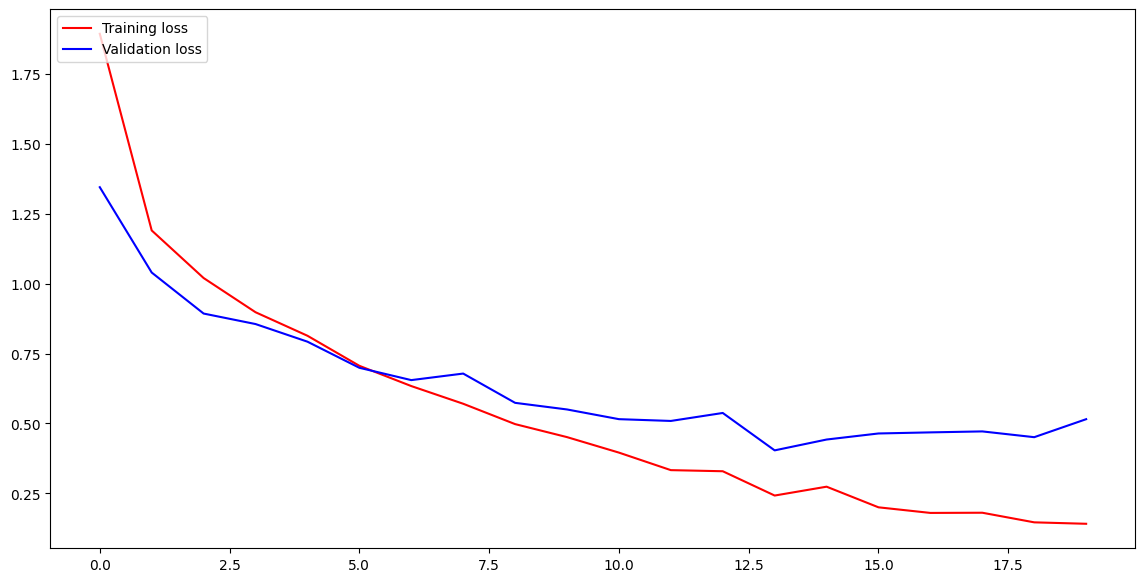

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [19]:
img = cv2.imread('/content/drive/MyDrive/Brain tumor dataset/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [20]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

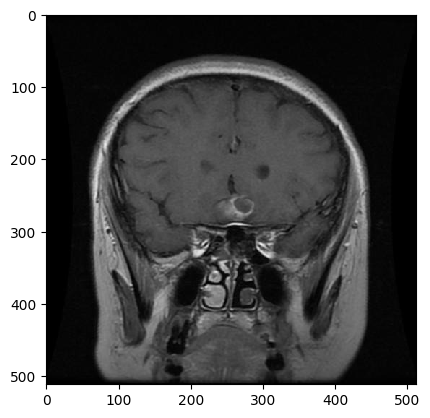

In [21]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Brain tumor dataset/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [22]:
a=model.predict(img_array)
indices = a.argmax()
indices,labels[indices]

1/1 [==============================] - 1s 545ms/step


(3, 'pituitary_tumor')

In [24]:
img = cv2.imread('/content/drive/MyDrive/Brain tumor dataset/Testing/no_tumor/image(10).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [25]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

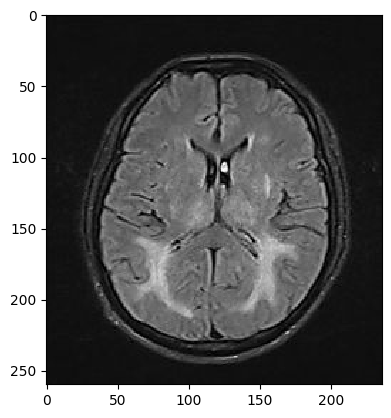

In [26]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Brain tumor dataset/Testing/no_tumor/image(10).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [27]:
a=model.predict(img_array)
indices = a.argmax()
indices,labels[indices]

1/1 [==============================] - 0s 92ms/step


(2, 'no_tumor')

In [28]:
from google.colab import files
uploaded=files.upload()
uploaded= list(uploaded.keys())[0]

Saving image(92).jpg to image(92).jpg


In [29]:
img = cv2.imread(uploaded)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [30]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

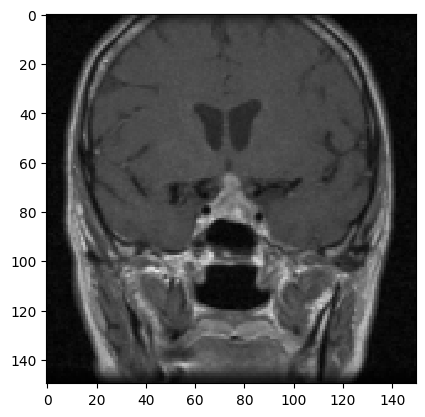

In [31]:
plt.imshow(img,interpolation='nearest')
plt.show()

In [32]:
a=model.predict(img_array)
indices = a.argmax()
indices,labels[indices]

1/1 [==============================] - 0s 69ms/step


(3, 'pituitary_tumor')